In [1]:
from knn_restructured.knn import KNN
from knn_restructured.utils import *
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

In [2]:
'''
bucket_name = 'statsdata'
train_file_name = 'MNIST_train.csv'
test_file_name = 'MNIST_test.csv'
region = 'us-east-2'

client = boto3.client('s3')#aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key

resource = boto3.resource('s3') #high-level object-oriented API
my_bucket = resource.Bucket(bucket_name) #subsitute this for your s3 bucket name.
'''

"\nbucket_name = 'statsdata'\ntrain_file_name = 'MNIST_train.csv'\ntest_file_name = 'MNIST_test.csv'\nregion = 'us-east-2'\n\nclient = boto3.client('s3')#aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key\n\nresource = boto3.resource('s3') #high-level object-oriented API\nmy_bucket = resource.Bucket(bucket_name) #subsitute this for your s3 bucket name.\n"

In [3]:
'''train = pd.read_csv('s3://statsdata/MNIST_train.csv',header=None)

test = pd.read_csv('s3://statsdata/MNIST_test.csv',header=None)
'''
train = pd.read_csv('data/MNIST_train_small.csv', header=None)
train.rename(columns={0:'label'}, inplace=True)
test = pd.read_csv('data/MNIST_test_small.csv', header=None)
test.rename(columns={0:'label'}, inplace=True)

In [4]:
ss = StandardScaler()
standardized_train = ss.fit_transform(train.iloc[:, 1:])
standardized_test = ss.transform(test.iloc[:, 1:])

In [5]:
pca = PCA(n_components=764, svd_solver='arpack')
transformed_train = pca.fit_transform(standardized_train)
transformed_test = pca.transform(standardized_test)

In [6]:
df_train = pd.DataFrame(data=transformed_train, columns=np.arange(1, 765, 1))
df_train.insert(loc=0, column='label', value=train['label'])
df_test = pd.DataFrame(data=transformed_test, columns=np.arange(1, 765, 1))
df_test.insert(loc=0, column='label', value=test['label'])

In [7]:
#train_pca, test_pca, var = get_pca_data(train, test)

In [8]:
init_train_200 = time.time()
a_knn_train_train_200 = KNN(train.iloc[:,:201], minkowski_dist_f(2))
a_knn_train_train_200.initalize_nn_list(train.iloc[:,:201])
total_init_train_200 = init_train_200 - time.time()

init_train_300 = time.time()
a_knn_train_train_300 = KNN(train.iloc[:,:301], minkowski_dist_f(2))
a_knn_train_train_300.initalize_nn_list(train.iloc[:,:301])
total_init_train_300 = init_train_300 - time.time()

100%|██████████| 3000/3000 [00:33<00:00, 90.45it/s] 


In [9]:
init_test = time.time()
a_knn_train_test = KNN(train.iloc[:,:201], minkowski_dist_f(2))
a_knn_train_test.initalize_nn_list(test.iloc[:,:201])
total_init_test = init_test - time.time()

100%|██████████| 1000/1000 [00:12<00:00, 78.67it/s]


In [10]:
k_list = [k for k in range(1, 21)] 

#training_emp_risks = pd.DataFrame(data=k_list, columns=['k'])
#training_emp_risks['dataset'] = '200 PCs'

test_emp_risks_200 = pd.DataFrame(data=k_list, columns=['k'])
test_emp_risks_200['dataset'] = 'Test 200 PCs'
test_emp_risks_300 = pd.DataFrame(data=k_list, columns=['k'])
test_emp_risks_300['dataset'] = 'Test 300 PCs'

'''
#training_acc = pd.DataFrame(data=k_list, columns=['k'])
test_acc = pd.DataFrame(data=k_list, columns=['k'])
#training_acc['dataset'] = '300 PCs'
test_acc['dataset'] = '300 PCs'
'''

"\n#training_acc = pd.DataFrame(data=k_list, columns=['k'])\ntest_acc = pd.DataFrame(data=k_list, columns=['k'])\n#training_acc['dataset'] = '300 PCs'\ntest_acc['dataset'] = '300 PCs'\n"

In [12]:
training_labels = list(train["label"].values)
test_labels = list(test["label"].values) 

'''
pred_train = time.time()
for inx, row in training_emp_risks.iterrows():
    training_predictions = a_knn_train_train.predict(list(train.index), k=row['k'], loocv=False)
    train_emp = get_emp_risk(training_labels, training_predictions)
    training_emp_risks.loc[inx,'emperical_risk'] = train_emp
    
    acc = accuracy_score(training_labels, training_predictions, normalize=True, sample_weight=None)
    training_acc.loc[inx,'accuracy'] = acc
total_pred_train = time.time() - pred_train
 '''   
    
pred_test_200 = time.time()
for inx, row in test_emp_risks_200.iterrows():
    test_predictions = a_knn_train_train_200.predict(list(test.index), k=row['k'], loocv=False)
    
    test_emp = get_emp_risk(test_labels, test_predictions)
    test_emp_risks_200.loc[inx,'emperical_risk'] = test_emp
    
    '''
    acc = accuracy_score(test_labels, test_predictions, normalize=True, sample_weight=None)
    test_acc.loc[inx,'accuracy'] = acc
    '''
total_pred_test_200 = time.time() - pred_test_200

In [13]:
pred_test_300 = time.time()
for inx, row in test_emp_risks_300.iterrows():
    test_predictions = a_knn_train_train_300.predict(list(test.index), k=row['k'], loocv=False)
    
    test_emp = get_emp_risk(test_labels, test_predictions)
    test_emp_risks_300.loc[inx,'emperical_risk'] = test_emp
    
    '''
    acc = accuracy_score(test_labels, test_predictions, normalize=True, sample_weight=None)
    test_acc.loc[inx,'accuracy'] = acc
    '''
total_pred_test_300 = time.time() - pred_test_300

In [14]:
'''emp_risks = training_emp_risks.append(test_emp_risks, ignore_index=True)
accuracies = training_acc.append(test_acc, ignore_index=True)'''
emp_risks = test_emp_risks_200.append(test_emp_risks_300, ignore_index=True)

In [15]:
'''g=sns.lineplot(data=accuracies, x='k', y='accuracy', hue='dataset')

g.set(xlabel='k', ylabel='Acc')

plt.gcf().set_size_inches(11.7, 8.27)
plt.xticks(np.arange(1,21,1))

plt.savefig("images/question_a_accuracy.png")'''

'g=sns.lineplot(data=accuracies, x=\'k\', y=\'accuracy\', hue=\'dataset\')\n\ng.set(xlabel=\'k\', ylabel=\'Acc\')\n\nplt.gcf().set_size_inches(11.7, 8.27)\nplt.xticks(np.arange(1,21,1))\n\nplt.savefig("images/question_a_accuracy.png")'

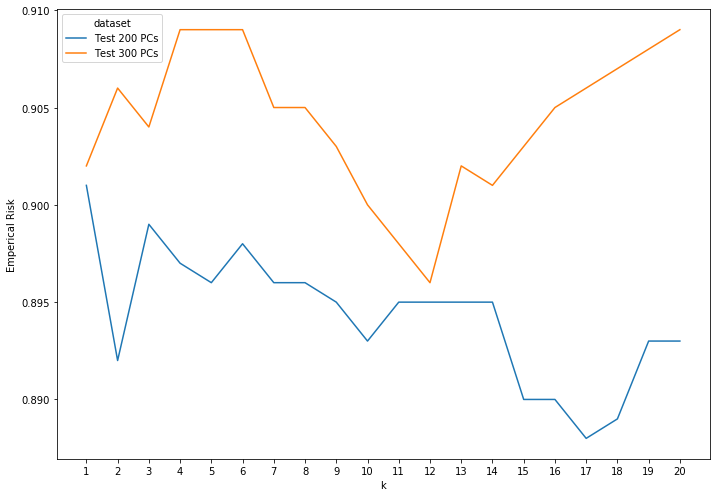

In [16]:
g=sns.lineplot(data=emp_risks, x='k', y='emperical_risk', hue='dataset')

g.set(xlabel='k', ylabel='Emperical Risk')

plt.gcf().set_size_inches(11.7, 8.27)
plt.xticks(np.arange(1,21,1))

plt.savefig("images/question_g_empirical_risk.png")